In [22]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [23]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [24]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [25]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [26]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [27]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [77]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_2(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]

def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]


def make_distances_osw(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum")
    ]


def make_distances_ttl2(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]



def make_distances_ttl2_lite(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]


def make_distances_ttl2_sq_hs(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]


def get_dists_weights(dists):
    return [x.get_weights() for x in dists]

def get_dists_weights_osw(dists):
    for dist in dists:
        w = dist.get_weights()
        smw = w[0].numpy() * tf.nn.softmax(w[1]).numpy()
        print(dist, ":", smw / smw.sum())
    return [x.get_weights() for x in dists]

_____________


### USCA312 fake product spaces example
**(no exponential map, just default gradients & adam optimizer)**

In [13]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [14]:
distances_matrix

array([[0.   , 1.167, 1.579, ..., 1.209, 0.866, 1.112],
       [1.167, 0.   , 0.413, ..., 0.045, 1.904, 0.082],
       [1.579, 0.413, 0.   , ..., 0.37 , 2.312, 0.467],
       ...,
       [1.209, 0.045, 0.37 , ..., 0.   , 1.95 , 0.107],
       [0.866, 1.904, 2.312, ..., 1.95 , 0.   , 1.87 ],
       [1.112, 0.082, 0.467, ..., 0.107, 1.87 , 0.   ]])

In [15]:
d = make_model()
qs = d.sparse_arange(312)  # queries
r_matrix = np.mean(distances_matrix <= 1.)  # not used
distances_matrix.shape

(312, 312)

In [16]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

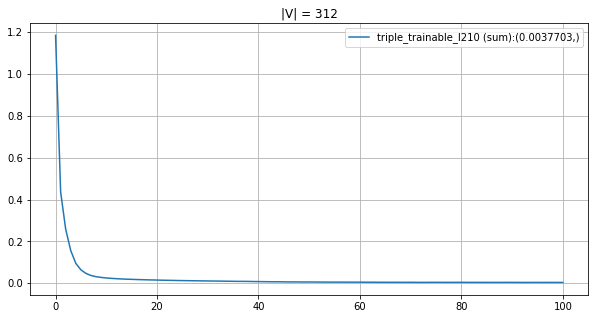


0.0037703	triple_trainable_l210 (sum)


In [17]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [18]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [0.00395206 0.00881544 0.82282657 0.00621013 0.01013587 0.02241301
 0.00614673 0.00901528 0.01255508 0.00663313 0.00121673 0.01029002
 0.00644556 0.010305   0.01251903 0.00613039 0.00942042 0.00888821
 0.00618895 0.00959776 0.0102946 ]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.1678869866568187>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([-0.93285762, -0.13059025,  4.40564992, -0.48091404,  0.00898477,
          0.80254624, -0.49117503, -0.10817487,  0.22302975, -0.41501808,
         -2.11092854,  0.02407936, -0.44370379,  0.02553339,  0.22015471,
         -0.493837  , -0.06421598, -0.12236989, -0.4843298 , -0.04556539,
          0.02452424])>]]

In [36]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

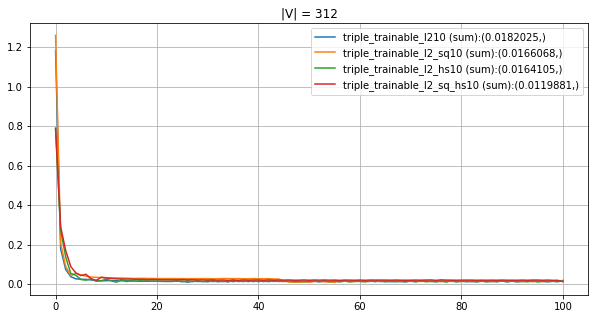

0.0182025	triple_trainable_l210 (sum)
0.0166068	triple_trainable_l2_sq10 (sum)
0.0164105	triple_trainable_l2_hs10 (sum)
0.0119881	triple_trainable_l2_sq_hs10 (sum)


In [37]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [38]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [3.10974651e-04 8.78608510e-03 3.07235761e-03 1.36331027e-03
 4.26808676e-03 2.79426951e-03 1.01303315e-03 7.25908895e-03
 8.36265891e-03 8.35140767e-03 1.92968319e-03 1.04775055e-02
 5.44199530e-03 2.62856247e-03 1.12697117e-01 9.17961613e-03
 2.77847851e-03 1.11920699e-02 5.70764638e-03 1.63468460e-03
 7.90751368e-01]
triple_trainable_l2_sq10 (sum) : [2.99957664e-04 6.34330002e-03 6.10070785e-04 3.91099608e-03
 7.40902596e-04 4.97842253e-03 2.26696551e-02 1.25592450e-03
 4.11104707e-01 5.53441522e-03 2.93628057e-03 4.13561083e-01
 6.90271832e-03 4.28487502e-03 6.98846669e-02 1.25583854e-02
 1.68642059e-03 3.07372189e-02]
triple_trainable_l2_hs10 (sum) : [5.14905635e-05 2.66422294e-04 1.41168959e-04 3.10391384e-05
 9.62267136e-04 2.07742296e-05 3.71029547e-05 1.82484592e-04
 6.66184688e-03 1.16602065e-03 4.28868355e-02 1.77103136e-03
 8.61604242e-05 2.27955891e-04 5.99347838e-05 6.67417968e-03
 1.54039100e-03 1.10272610e-01 4.31713300e-04 1.25601746e-03
 

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5319382207158747>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([-2.79873133,  0.54248178, -0.50824223, -1.32077168, -0.17952179,
         -0.60311673, -1.6177385 ,  0.35156688,  0.49308898,  0.49174266,
         -0.97333161,  0.71854317,  0.06345833, -0.66425034,  3.09401639,
          0.58629794, -0.60878397,  0.78451803,  0.1111193 , -1.13923757,
          5.04229614])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.597519234431662>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([-3.64510785, -0.59359477, -2.9351742 , -1.07720182, -2.74088002,
         -0.83588083,  0.68003334, -2.21312196,  3.57785403, -0.730008  ,
         -1.36385024,  3.58381131, -0.50907862, -0.98590253,  1.80585235,
          0.08939469, -1.91838562,  0.98448035])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5

In [39]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

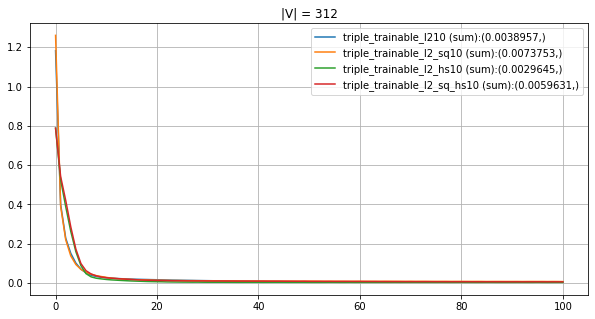

0.0038957	triple_trainable_l210 (sum)
0.0073753	triple_trainable_l2_sq10 (sum)
0.0029645	triple_trainable_l2_hs10 (sum)
0.0059631	triple_trainable_l2_sq_hs10 (sum)


In [40]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [41]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [0.00427273 0.0092964  0.80396747 0.00657281 0.01191484 0.02363667
 0.00639176 0.00952926 0.01342912 0.00652877 0.00140885 0.00984699
 0.0068668  0.01556953 0.01542022 0.00610755 0.01236662 0.00887675
 0.00676807 0.00928423 0.01194456]
triple_trainable_l2_sq10 (sum) : [0.01420604 0.0208483  0.01562153 0.10847493 0.02542651 0.05726091
 0.01832388 0.05328459 0.0299484  0.01758448 0.10822519 0.03105135
 0.01931073 0.16913773 0.03383392 0.02813395 0.12256002 0.12676755]
triple_trainable_l2_hs10 (sum) : [2.49868025e-03 1.59009756e-02 5.19150851e-02 5.86009790e-04
 3.21706444e-02 5.86458898e-01 3.67191123e-03 4.16259184e-03
 1.24116100e-02 5.63938738e-03 7.56707281e-03 1.57079493e-02
 5.48864230e-03 1.49715513e-02 1.81341287e-01 8.53957974e-03
 9.39106546e-03 2.05068681e-02 4.72905039e-03 5.92228762e-03
 1.04188525e-02]
triple_trainable_l2_sq_hs10 (sum) : [0.01689096 0.00857683 0.00199651 0.64051336 0.06112604 0.00499065
 0.00354085 0.05169219 0.00761579 0.00369

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2262508532528757>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([-0.96176749, -0.18439477,  4.27553727, -0.53108014,  0.06376322,
          0.74877758, -0.55901117, -0.15965425,  0.18340377, -0.53780345,
         -2.07124431, -0.12685551, -0.48732276,  0.33129451,  0.32165819,
         -0.60449616,  0.1009794 , -0.23058642, -0.5018063 , -0.18570453,
          0.06625456])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.560107899185266>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([-1.21012951, -0.82652409, -1.11514643,  0.82272262, -0.62800423,
          0.18382169, -0.95559159,  0.11185065, -0.4643204 , -0.99677957,
          0.8204177 , -0.42815433, -0.90313561,  1.26691689, -0.34233256,
         -0.52681945,  0.94480442,  0.97855864])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2

__________________

# CS PhDs

In [42]:
G, distances_matrix = utils.get_dataset(distances_matrix=True)

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


In [43]:
def make_model_g(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(1025, 1025)

In [46]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

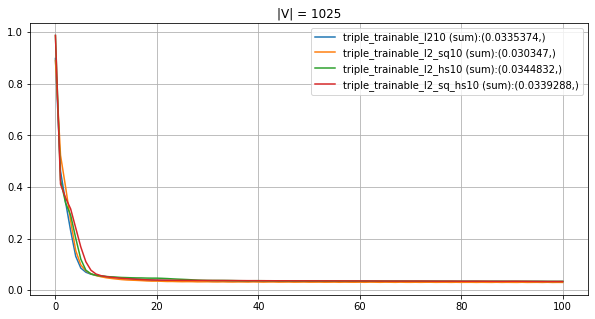

0.0335374	triple_trainable_l210 (sum)
0.030347	triple_trainable_l2_sq10 (sum)
0.0344832	triple_trainable_l2_hs10 (sum)
0.0339288	triple_trainable_l2_sq_hs10 (sum)


In [47]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [48]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [1.10156656e-04 2.84727250e-04 4.97372710e-05 4.23712710e-01
 5.06363482e-04 1.29268148e-05 1.09471032e-01 1.72137442e-04
 5.15488520e-05 4.40160323e-04 4.46679610e-01 1.58528984e-05
 1.11563345e-04 3.59673753e-04 1.52822877e-05 1.61637106e-04
 3.61628909e-04 5.64094238e-06 1.20608414e-04 2.75020923e-04
 1.70819812e-02]
triple_trainable_l2_sq10 (sum) : [2.16526961e-02 1.76347073e-04 6.03115509e-02 2.17032294e-04
 2.09940253e-01 2.02917705e-04 2.04080642e-04 3.26245502e-04
 1.11130776e-05 1.48319842e-04 4.23152833e-01 1.33612442e-05
 2.11677114e-04 2.76581161e-01 2.58962836e-05 6.59296061e-03
 1.71044434e-04 6.05100993e-05]
triple_trainable_l2_hs10 (sum) : [4.98683771e-04 3.25563884e-04 9.65310768e-05 5.67581886e-01
 1.56373602e-04 2.33397831e-05 2.08468370e-04 1.49363979e-04
 2.71338185e-01 1.82289302e-04 6.92248302e-05 9.44965293e-06
 4.25767843e-04 5.39843495e-05 1.08263232e-05 1.60784840e-04
 5.98836757e-05 6.72634147e-02 1.86643249e-04 5.41227284e-05
 

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.300342620434856>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([-2.75667068, -1.80704248, -3.55181961,  5.49823675, -1.23131942,
         -4.89927036,  4.14484107, -2.31028094, -3.51604424, -1.37143515,
          5.55102268, -4.69522183, -2.74398163, -1.5733768 , -4.73187969,
         -2.37322044, -1.56795561, -5.72852304, -2.66602513, -1.841727  ,
          2.28720528])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=5.444867445923256>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([ 1.24368327, -3.56674792,  2.26807694, -3.35915582,  3.51537627,
         -3.42640148, -3.42068676, -2.95155181, -6.3310794 , -3.73983094,
          4.21628672, -6.14684369, -3.38413991,  3.7910576 , -5.48510252,
          0.0545558 , -3.59727861, -4.6363917 ])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.18

__________________

# POWER

In [72]:
G, distances_matrix = utils.get_dataset("power", distances_matrix=True)

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


In [73]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(4941, 4941)

In [74]:
dists = make_distances_ttl2_lite(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

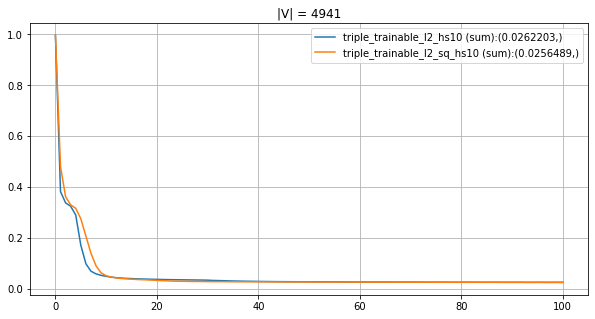

In [75]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

In [76]:
get_dists_weights_osw(dists)

triple_trainable_l2_hs10 (sum) : [2.21136987e-03 1.92305190e-04 8.08888452e-05 4.97511991e-01
 7.43376361e-05 9.20693236e-06 9.32805345e-05 7.69569183e-05
 4.99235899e-01 4.23739990e-05 2.81387653e-05 6.06500214e-06
 6.84479689e-05 2.51979012e-05 2.02185460e-06 6.53733013e-05
 3.20692598e-05 5.25629329e-05 3.81881481e-05 3.41041405e-05
 1.19221116e-04]
triple_trainable_l2_sq_hs10 (sum) : [7.63043588e-04 3.64669804e-04 2.93047430e-03 1.68948695e-04
 4.69743942e-01 1.12002438e-04 6.92439821e-02 4.69767213e-05
 1.94455846e-03 2.62979739e-05 3.61821256e-05 4.54320695e-01
 5.36355812e-05 3.17351303e-05 4.52406725e-06 1.05249699e-04
 2.10451017e-05 8.20373768e-05]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.547850150188591>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([ 1.131346  , -1.31093781, -2.17694552,  6.54735349, -2.26140408,
         -4.35006473, -2.03441   , -2.22677569,  6.55081256, -2.82348651,
         -3.23287328, -4.76748656, -2.34394757, -3.34326074, -5.86600624,
         -2.38990751, -3.10212352, -2.60801028, -2.92749624, -3.04060265,
         -1.78904156])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.9839906403879666>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([-1.13405738, -1.87238024,  0.21154703, -2.64177744,  5.28857049,
         -3.05285189,  3.37401899, -3.92172035, -0.19858231, -4.50188063,
         -4.1828073 ,  5.25518607, -3.78915986, -4.31394825, -6.26196111,
         -3.11503692, -4.7247047 , -3.36419757])>]]

_______________________

# Facebook

In [78]:
G, distances_matrix = utils.get_dataset("facebook", distances_matrix=True)

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


In [79]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(4039, 4039)

In [69]:
dists = make_distances_ttl2_lite(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

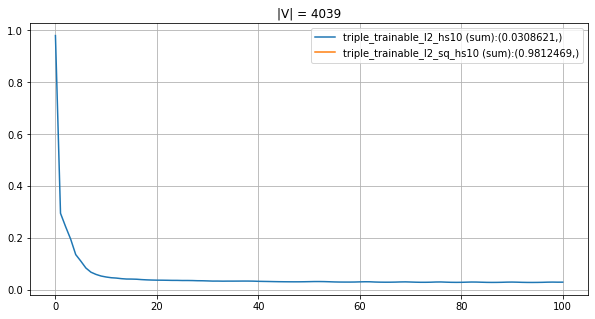

1:0.9043520220778505
2:0.8084867713734282
3:0.6993255726116838
4:0.5855087072457463
5:0.47376619892662253
6:0.39440344218976076
7:0.3437491235285591
8:0.3233395649065078


KeyboardInterrupt: 

In [70]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [71]:
get_dists_weights_osw(dists)

triple_trainable_l2_hs10 (sum) : [5.09242511e-02 6.83635157e-01 2.31981649e-05 6.54491384e-05
 1.21938129e-01 4.76770182e-06 2.08092363e-02 4.61810343e-02
 4.25411429e-04 4.54439885e-05 5.62714265e-03 7.77450977e-06
 2.79006056e-05 1.53482197e-02 1.33455496e-06 1.23719269e-04
 8.68969513e-03 3.11853518e-05 3.48680736e-04 1.00825276e-04
 4.56414433e-02]
triple_trainable_l2_sq_hs10 (sum) : [0.12879883 0.12093821 0.13025772 0.09079791 0.13020866 0.09990313
 0.02463887 0.02458548 0.02462691 0.02509003 0.02485914 0.02547813
 0.02472028 0.02467602 0.02474094 0.0251211  0.02487164 0.02568701]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.5489751295300567>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([ 2.28016672,  4.87725185, -5.41385464, -4.37665448,  3.15334125,
         -6.99606342,  1.38522441,  2.18239667, -2.50487104, -4.74144727,
          0.07742926, -6.50707741, -5.22927942,  1.08082695, -8.26932994,
         -3.73991278,  0.51196532, -5.11797932, -2.7037711 , -3.94453873,
          2.17064361])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.830633716842569>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([ 0.82783204,  0.76486003,  0.83909525,  0.47821661,  0.83871856,
          0.57378134, -0.82609421, -0.82826362, -0.82658006, -0.80794906,
         -0.81719416, -0.7925991 , -0.82279587, -0.82458796, -0.82196023,
         -0.80671168, -0.81669167, -0.78443416])>]]

In [80]:
dists = make_distances_ttl2_sq_hs(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

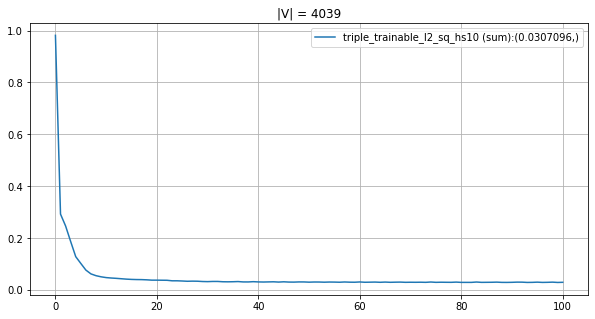

In [81]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [82]:
get_dists_weights_osw(dists)

triple_trainable_l2_sq_hs10 (sum) : [1.82306869e-02 8.07550262e-01 3.40905915e-05 1.17826818e-01
 7.86595941e-04 2.92149300e-02 4.18290241e-05 2.51773833e-04
 6.23683670e-06 7.93747173e-06 4.02051041e-03 1.09826471e-06
 1.03419725e-03 7.06869085e-05 8.01668403e-03 1.82821594e-05
 1.28860767e-02 1.30338832e-06]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.5052426670216783>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([ 0.90099234,  4.69189137, -5.38084777,  2.76710198, -2.24215451,
          1.37256595, -5.17627875, -3.38133801, -7.07939609, -6.8382744 ,
         -0.61070506, -8.81613781, -1.96848841, -4.65160882,  0.07941095,
         -6.00394352,  0.55403348, -8.64490193])>]]

______________________
## Wiki 
### aka WLA6 - bfs on Wikipedia categories from Linear Algebra, depth = 6

In [62]:
G, distances_matrix = utils.get_dataset("wla6", distances_matrix=True)

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


In [63]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(3227, 3227)

In [64]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

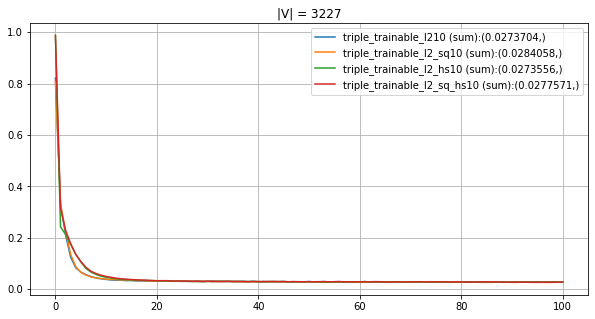

In [65]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [66]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [8.12456117e-01 3.44584964e-03 1.74535726e-04 6.13168818e-04
 2.03908257e-03 6.86396696e-05 1.98171398e-03 8.95583804e-03
 2.72468413e-04 8.18291589e-04 1.42224787e-02 2.45552462e-04
 3.46338589e-04 1.38339333e-03 6.54751394e-05 5.96068111e-04
 1.37065059e-02 1.08943222e-04 4.44380542e-03 1.27302035e-01
 6.75369898e-03]
triple_trainable_l2_sq10 (sum) : [3.64544640e-01 2.15305287e-03 3.38709854e-02 3.91231711e-02
 2.21980856e-04 4.28464431e-04 3.57576976e-02 1.52825947e-02
 4.45324994e-03 4.25834718e-02 4.59169967e-01 3.55404736e-04
 2.22394760e-04 7.88540061e-04 4.33635900e-05 2.32453722e-04
 7.43294904e-04 2.52725458e-05]
triple_trainable_l2_hs10 (sum) : [9.79308131e-01 1.96257329e-03 2.12385524e-04 3.82790008e-04
 7.86527690e-04 6.40682824e-05 1.26869803e-03 1.00249342e-03
 2.05015445e-04 1.41058930e-04 1.96096062e-04 3.75227883e-05
 1.13119063e-04 2.61800095e-04 2.03487603e-05 1.43070982e-04
 2.28057295e-04 4.54338015e-05 3.59223181e-04 1.95444548e-04
 

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.3047772388331222>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([ 4.81883406, -0.64405734, -3.62685367, -2.37034283, -1.16872786,
         -4.56011249, -1.19726573,  0.31107777, -3.18146044, -2.08176439,
          0.77359587, -3.28547251, -2.94156625, -1.55668843, -4.60731261,
         -2.39862819,  0.73664275, -4.09815628, -0.38971676,  2.96533464,
          0.0288625 ])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.670255088642903>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([ 3.38458456, -1.74717768,  1.00849431,  1.15265045, -4.01922859,
         -3.361612  ,  1.06270111,  0.21265013, -1.0204303 ,  1.23740174,
          3.61535599, -3.54856249, -4.01736573, -2.75163652, -5.65219958,
         -3.97312857, -2.81072685, -6.19210107])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2

# eu Core

In [53]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [54]:
dists = make_distances_ttl2(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

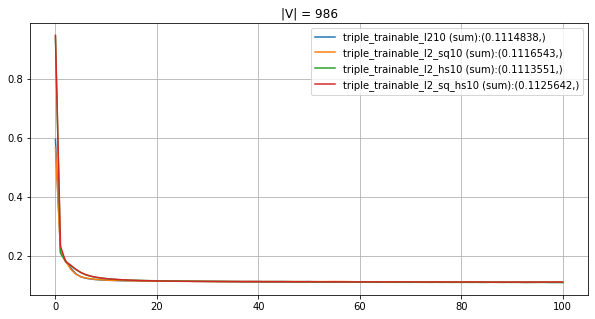

In [55]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [56]:
get_dists_weights_osw(dists)

triple_trainable_l210 (sum) : [4.36882423e-01 1.09309947e-03 3.48488560e-04 2.51203449e-03
 9.44072590e-04 4.51530602e-04 1.31887020e-03 2.68309727e-03
 9.99923729e-04 1.08933609e-03 1.56258505e-03 2.51197032e-03
 1.41021409e-03 1.61274968e-03 5.41746324e-04 9.87009191e-04
 2.38003335e-03 9.94884190e-04 2.12302869e-02 5.06957747e-01
 1.14878977e-02]
triple_trainable_l2_sq10 (sum) : [0.43096446 0.00108003 0.0022958  0.00112644 0.00181168 0.00217055
 0.00137764 0.00210512 0.00126997 0.00135973 0.00158325 0.0006075
 0.00140847 0.00184256 0.000958   0.0045183  0.50895117 0.03456933]
triple_trainable_l2_hs10 (sum) : [1.95385882e-02 5.41529227e-01 6.12440779e-04 2.16553660e-01
 2.17898420e-03 1.69477710e-04 2.08079596e-01 9.06381362e-04
 7.58088804e-04 1.18160662e-03 6.64540614e-04 9.35021150e-04
 5.22541561e-04 8.66772079e-04 6.20004962e-05 5.11243092e-04
 7.75299112e-04 5.24502447e-04 8.91203963e-04 8.17371765e-04
 1.92145348e-03]
triple_trainable_l2_sq_hs10 (sum) : [6.87264489e-02 8.77110

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.7644785438892352>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(21,) dtype=float64, numpy=
  array([ 4.29777887, -1.69286803, -2.83603511, -0.86079226, -1.83943746,
         -2.57699737, -1.50510978, -0.79491341, -1.78196151, -1.69631682,
         -1.3355437 , -0.8608178 , -1.43814371, -1.30394464, -2.39484266,
         -1.79496116, -0.91477074, -1.78701418,  1.27354355,  4.44654243,
          0.65940887])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.764689752637687>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(18,) dtype=float64, numpy=
  array([ 4.16081989, -1.82822019, -1.07412288, -1.78614581, -1.31095094,
         -1.13022522, -1.58483546, -1.16083448, -1.66621172, -1.59791606,
         -1.44572875, -2.403612  , -1.56269836, -1.29404776, -1.94811578,
         -0.3970689 ,  4.32714634,  1.63776108])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0